## Analysis 2

1. After talking about the overall datasets, now let's look at the happiness scores distribution of each region.

2. Visualizing Distributions of observations within region categories.

3. according to the swarmplot, we can divided the score into four groups:#2-4,4-6,6-8; and we can give the lable of the three groups: 

In [2]:
import pandas as pd
# from pythainlp.segment import segment
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats, integrate
%matplotlib inline

In [3]:
# define the function to calculate and create the total score of happiness.
def getTotalScore(str):
    # load the data
    data = pd.read_csv(str)
    # get all the columns that to be added together
    colums = data.ix[:,2:]
    # add the new column named 'total score'
    # data['total score'] = colums.sum(axis = 1).head()
    data['total score'] = np.sum(colums,axis = 1)
    # return the data frame
    return data

In [4]:
#define the function to sort based on total score and add a new column named rank
def getRank(data):
    # sort the data by the total score with descending order.
    newData = data.sort_values(by='total score',ascending=False)
    # reindex the new data.
    newData['Rank'] = range(1,len(data) + 1)
    newData.index = range(0,len(data))
    return newData

In [5]:
data2015=getTotalScore('data/2015.csv')
data2016=getTotalScore('data/2016.csv')

In [6]:
data1 = getRank(data2015)
data2 = getRank(data2016)

In [7]:
data1['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

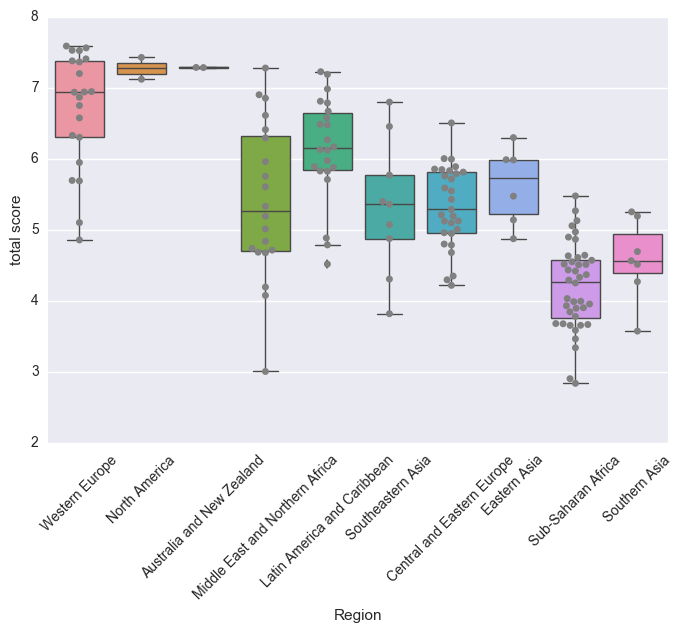

In [8]:
#Distributions of observations within categories
# Boxplots
# swarmplot
# to compare the distribution of a variable across levels of other variables.
sns.set()
ax = sns.boxplot(x="Region", y="total score", data=data1,linewidth=1.0)
ax = sns.swarmplot(x="Region", y="total score", data=data1, color=".5")
plt.xticks(rotation=45)
# plt.savefig('2-1.png')

In [9]:
group = data1.groupby('Region')['total score'].mean()

In [10]:
data3 = pd.concat([pd.DataFrame(group.index), pd.DataFrame(group.values)], axis=1)

In [11]:
data3.columns=['Region', 'MeanScore']

In [12]:
data4 = data3.sort_values(by='MeanScore',ascending=False)

In [13]:
data4

,Region,MeanScore
0,Australia and New Zealand,7.285070
5,North America,7.273225
9,Western Europe,6.689729
3,Latin America and Caribbean,6.144683
2,Eastern Asia,5.626272
4,Middle East and Northern Africa,5.406916
1,Central and Eastern Europe,5.332860
6,Southeastern Asia,5.317540
7,Southern Asia,4.580707
8,Sub-Saharan Africa,4.202828


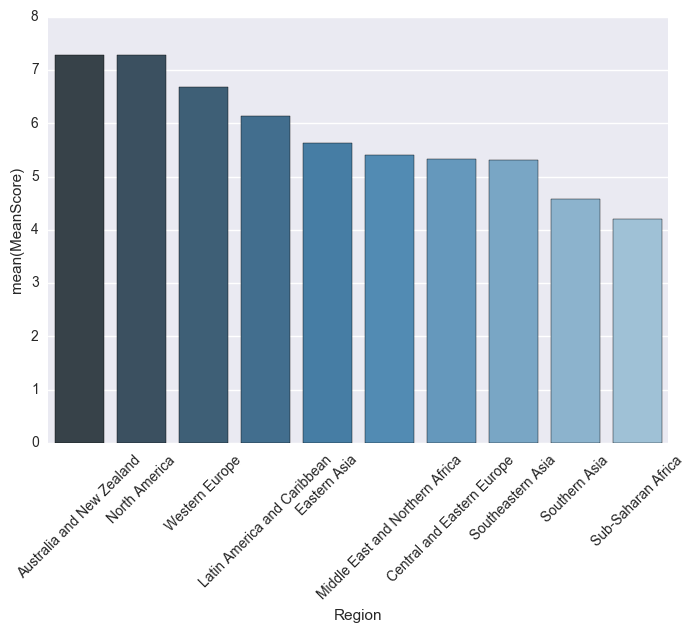

In [14]:
# Statistical estimation within categories
# bar plots
sns.set()
sns.barplot(x='Region', y='MeanScore',data=data4, color="salmon",palette="Blues_d");
plt.xticks(rotation=45)
plt.savefig('2-2.png')

In [ ]:
# according to the swarmplot, we can divided the score into four groups:
#2-4,4-6,6-8; and we can give the lable of the three groups: 

In [15]:
bins = [2,4,6,8]
group_names = ['low','Okay','Good']
categories = pd.cut(data1['total score'], bins, labels=group_names)
data1['categories'] = pd.cut(data1['total score'], bins, labels=group_names)

In [16]:
pd.value_counts(data1['categories'])

Okay    93
Good    44
low     21
Name: categories, dtype: int64

In [17]:
group2 = data1.groupby('Region')['categories'].value_counts()

In [18]:
group3 = pd.DataFrame(group2)

In [19]:
group3.head()

categories
Region                     categories            
Australia and New Zealand  Good                 2
Central and Eastern Europe Okay                27
                           Good                 2
Eastern Asia               Okay                 5
                           Good                 1

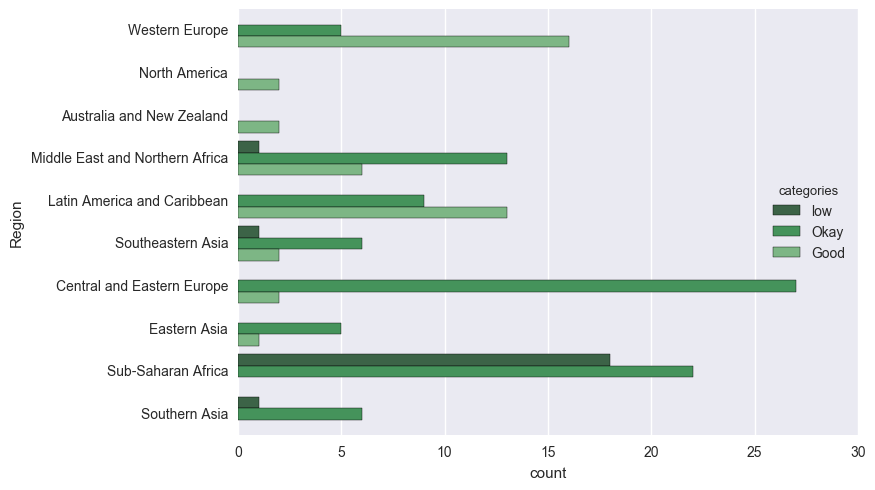

In [20]:
#Plotting with categorical data
sns.countplot(y="Region", hue = "categories", data = data1, palette="Greens_d")
plt.savefig('2-3.png')

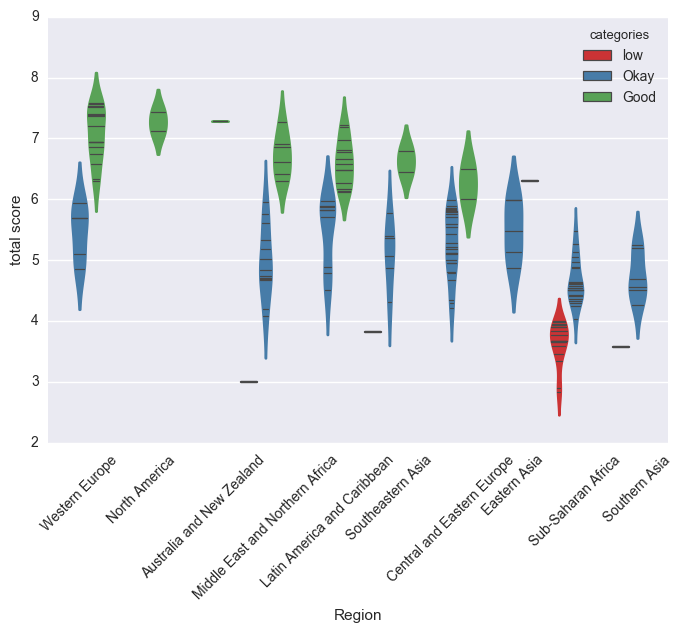

In [145]:
sns.violinplot(x="Region", y="total score", hue="categories", data=data1,
                inner="stick", palette="Set1");
plt.xticks(rotation=45)
plt.savefig('2-5.png')

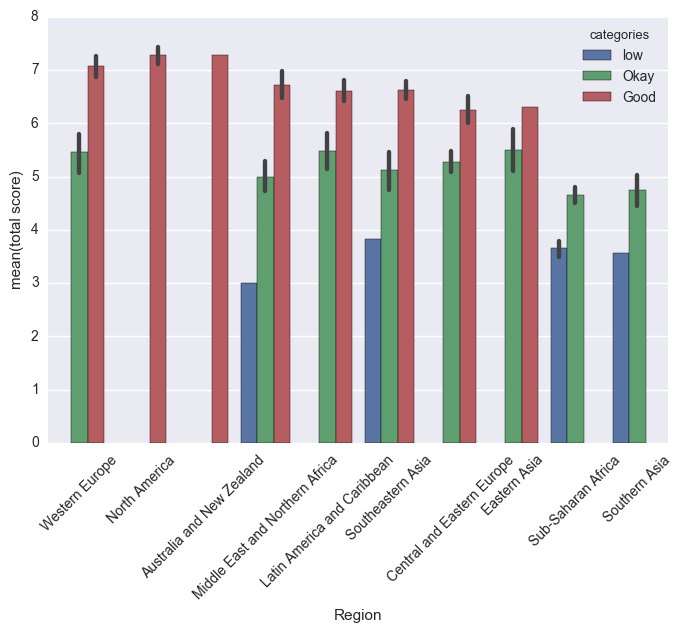

In [21]:
sns.barplot(x="Region", y="total score", hue="categories", data=data1);
plt.xticks(rotation=45)
plt.savefig('2-6.png')

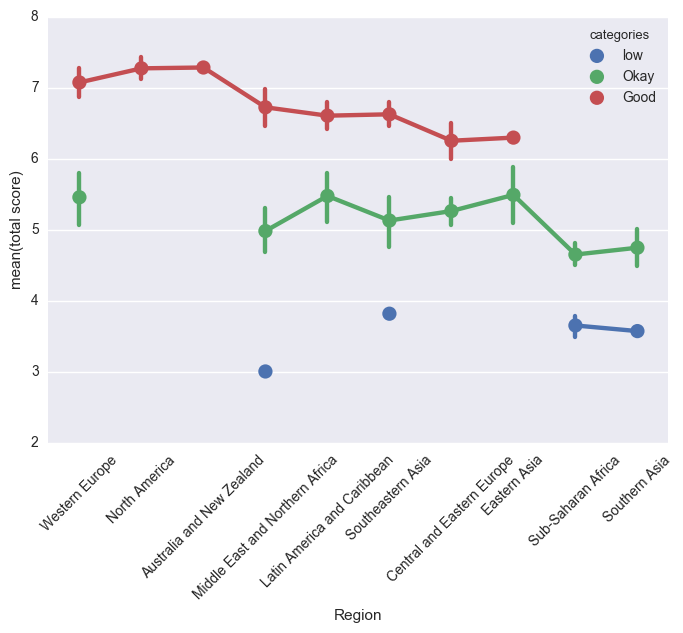

In [146]:
# Point Plot
sns.pointplot(x="Region", y="total score", hue="categories", data=data1);
plt.xticks(rotation=45)
plt.savefig('2-7.png')